In [3]:
%%file eggnog_utils.py
from io import StringIO

import pandas as pd


s = '''A	RNA processing and modification
B	Chromatin Structure and dynamics
C	Energy production and conversion
D	Cell cycle control and mitosis
E	Amino Acid metabolism and transport
F	Nucleotide metabolism and transport
G	Carbohydrate metabolism and transport
H	Coenzyme metabolism
I	Lipid metabolism
J	Translation
K	Transcription
L	Replication and repair
M	Cell wall/membrane/envelope biogenesis
N	Cell motility
O	Post-translational modification, protein turnover, chaperone functions
P	Inorganic ion transport and metabolism
Q	Secondary Structure
T	Signal Transduction
U	Intracellular trafficking and secretion
V	Defense mechanisms
Y	Nuclear structure
W	Extracellular structures
Z	Cytoskeleton
R	General Functional Prediction only
S	Function Unknown'''

cog_categories = pd.read_table(StringIO(s), names=['letter', 'function'], index_col=0, squeeze=True)
cog_categories.head()


COLUMN_NAMES = ['query', 'seed_ortholog', 'evalue', 'score', 'predicted_name', 'go_terms', 
                'kegg_ko', 'bigg_reactions',
           'tax_scope', 'eggnog_ogs', 'best_og', 'cog_cat', 'eggnog_hmmm_desc']


def read_eggnog(filename):
    eggnog = pd.read_table(filename, header=None, names=COLUMN_NAMES)
    eggnog['cog_category_full'] = eggnog.cog_cat.map(
        lambda x: '; '.join([cog_categories[i] for i in x.split(', ')]) if pd.notnull(x) else x)
    return eggnog

Overwriting eggnog_utils.py


In [5]:
import glob
import os

import pandas as pd

import eggnog_utils

dfs = []

for filename in glob.glob('../data/00_original/tick*.fake_ref_transcriptome.fasta.emapper.annotations.tsv'):
    
    new_filename = filename.replace('00_original', '012_read_eggnog_output')
    ! mkdir $(dirname $new_filename)
    df = eggnog_utils.read_eggnog(filename)
    df.to_csv(new_filename, sep='\t')
    df['tick_id'] = os.path.basename(filename).split('.')[0]
    dfs.append(df)
annotations = pd.concat(dfs, ignore_index=True)
print(annotations.shape)
annotations.head()

mkdir: ../data/012_read_eggnog_output: File exists
mkdir: ../data/012_read_eggnog_output: File exists
mkdir: ../data/012_read_eggnog_output: File exists
mkdir: ../data/012_read_eggnog_output: File exists
(15067, 15)


,query,seed_ortholog,evalue,score,predicted_name,go_terms,kegg_ko,bigg_reactions,tax_scope,eggnog_ogs,best_og,cog_cat,eggnog_hmmm_desc,cog_category_full,tick_id
0,PB.3.1|1001_0|path0:1-4172(+)|HQ_sampleytBMi1Q...,6945.ISCW018217-PA,1.400000e-66,260.8,SDC,"GO:0000902,GO:0000904,GO:0001667,GO:0003008,GO...",K16336,NaN,artNOG[6],"0386E@artNOG,0A1US@biNOG,0IW5I@euNOG,0VCQE@meN...",NA|NA|NA,T,Cell surface proteoglycan (By similarity),Signal Transduction,tick0
1,PB.8.1|1008_0|path3:1-3937(+)|HQ_sampleytBMi1Q...,6945.ISCW018083-PA,3.500000e-149,535.0,NaN,NaN,NaN,NaN,artNOG[6],"033W7@artNOG,09WWC@biNOG,0V7UI@meNOG,0XQ0P@NOG...",NA|NA|NA,U,TRIC channel,Intracellular trafficking and secretion,tick0
2,PB.9.1|1008_0|path4:1-3923(+)|HQ_sampleytBMi1Q...,6945.ISCW018083-PA,5.900000e-149,534.3,NaN,NaN,NaN,NaN,artNOG[6],"033W7@artNOG,09WWC@biNOG,0V7UI@meNOG,0XQ0P@NOG...",NA|NA|NA,U,TRIC channel,Intracellular trafficking and secretion,tick0
3,PB.11.2|101_0|path4:1-2908(+)|HQ_sampleytBMi1Q...,6945.ISCW018610-PA,3.300000e-38,165.2,NOLC1,"GO:0000278,GO:0000280,GO:0001071,GO:0002119,GO...",K11294,NaN,meNOG[21],"0A3DQ@biNOG,0VF6Y@meNOG,11U5P@NOG,13M9C@opiNOG...",NA|NA|NA,Y,nucleolar and coiled-body phosphoprotein 1,Nuclear structure,tick0
4,PB.14.1|1011_0|path0:183-1775(-)|HQ_sampleytBM...,7227.FBpp0100183,3.100000e-56,224.9,NaN,"GO:0003674,GO:0003824,GO:0003954,GO:0005575,GO...",K03881,NaN,artNOG[6],"03GA4@artNOG,0AYRX@biNOG,0H2PW@dipNOG,0KFRK@eu...",NA|NA|NA,C,"NADH-Ubiquinone/plastoquinone (complex I), var...",Energy production and conversion,tick0


In [ ]:
annotations.to_csv('../data/012_read_eggnog_output/all_tick_annotations.')

In [7]:
annotations['cog_category_full'].nunique()

96

In [8]:
annotations['eggnog_hmmm_desc'].nunique()

4694

In [9]:
annotations['query'].is_unique

True

In [12]:
data = annotations['go_terms'].map(
    lambda x: dict.fromkeys(x.split(','), 1) if isinstance(x, str) else dict()).values
go_matrix = pd.DataFrame.from_records(data)
go_matrix.index = annotations['query']
go_matrix = go_matrix.fillna(0)
print(go_matrix.shape)
go_matrix.head()

(15067, 10718)


,GO:0000001,GO:0000002,GO:0000003,GO:0000009,GO:0000010,GO:0000014,GO:0000018,GO:0000022,GO:0000023,GO:0000026,...,GO:2001257,GO:2001258,GO:2001259,GO:2001260,GO:2001261,GO:2001270,GO:2001271,GO:2001272,GO:2001273,GO:2001275
query,,,,,,,,,,,,,,,,,,,,,
PB.3.1|1001_0|path0:1-4172(+)|HQ_sampleytBMi1Qu|cb553_c1/f4p5/4244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.8.1|1008_0|path3:1-3937(+)|HQ_sampleytBMi1Qu|cb10120_c15/f2p3/3984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.9.1|1008_0|path4:1-3923(+)|HQ_sampleytBMi1Qu|cb10120_c8/f3p1/3971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.11.2|101_0|path4:1-2908(+)|HQ_sampleytBMi1Qu|cb16611_c40331/f3p7/1772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.14.1|1011_0|path0:183-1775(-)|HQ_sampleytBMi1Qu|cb16611_c205636/f9p10/1592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
go_sums = go_matrix.sum()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


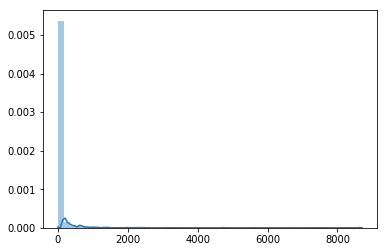

In [19]:
import seaborn as sns

%matplotlib inline
sns.distplot(go_sums)

In [ ]:
go_sums.groupby(annotations['tick_id']).apply(lambda x:)

In [14]:
go_matrix = go_matrix.astype(int)

In [15]:
go_matrix.to_csv('../data/012_read_eggnog_output/go_matrix.csv')

In [1]:
# import seaborn as sns
# sns.clustermap(go_matrix, method='ward')